In [1]:
# importing the packages
%matplotlib inline      
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np
import psycopg2
import sqlalchemy
from sqlalchemy import create_engine

In [2]:
try:
    connection = psycopg2.connect(user = "spyfu",
                                  password = "SpyfuU$3r",
                                  host = "18.219.13.131",
                                  port = "5432",
                                  database = "spyfu")
    cursor = connection.cursor()
except (Exception, psycopg2.Error) as error :
    print ("Error while connecting to PostgreSQL ", error)
else:
    print("Connection established")

Connection established


In [3]:
cursor.execute("select uuid, mcid, count(*) as count from click_agg_poc where uuid!='undefined' GROUP BY uuid, mcid order by uuid, count DESC")
res = cursor.fetchall()
print(len(res))

158015


In [4]:
res = pd.DataFrame(res)
res.columns = ['UUID','MCID','Count']
res.head(10)

,UUID,MCID,Count
0,00014d2471b8a6d4,368,1
1,00022a4a1d61367d,32644,1
2,0002b152d513495e,633,9
3,00033b01e49f7f3a,89,1
4,0003d8b9b67dc902,87,5
5,00055FD181EF44208FCB6C2ECDEAEC84,32644,1
6,00059604b0412daa,282,1
7,00065404E3634A29B59B57CD8F8349A0,337,1
8,0006ea34ea6d3a96,87,1
9,0008c917b7875b94,87,2


In [5]:
res.head()

,UUID,MCID,Count
0,00014d2471b8a6d4,368,1
1,00022a4a1d61367d,32644,1
2,0002b152d513495e,633,9
3,00033b01e49f7f3a,89,1
4,0003d8b9b67dc902,87,5


In [6]:
res[res['UUID']=='1CFB5C1DCD9D49A6B10ACB67B686757B']

,UUID,MCID,Count
13759,1CFB5C1DCD9D49A6B10ACB67B686757B,40442,16
13760,1CFB5C1DCD9D49A6B10ACB67B686757B,89,14
13761,1CFB5C1DCD9D49A6B10ACB67B686757B,337,12
13762,1CFB5C1DCD9D49A6B10ACB67B686757B,480,8
13763,1CFB5C1DCD9D49A6B10ACB67B686757B,282,5
13764,1CFB5C1DCD9D49A6B10ACB67B686757B,368,5
13765,1CFB5C1DCD9D49A6B10ACB67B686757B,87,4
13766,1CFB5C1DCD9D49A6B10ACB67B686757B,633,4
13767,1CFB5C1DCD9D49A6B10ACB67B686757B,5926,4
13768,1CFB5C1DCD9D49A6B10ACB67B686757B,85,2


In [7]:
res['UUID'].value_counts()

1CFB5C1DCD9D49A6B10ACB67B686757B    12
b89ad773d08b68ea                     8
25d606c002f488b3                     7
e8a9a406905e5972                     7
22dff8083b7eb42b                     6
daaac41af0032781                     6
13279265311a2ba7                     6
2fa36dd521b54788                     6
421973975339222e                     6
0c24cdeeaffc5378                     6
3f4e37b08f6a2589                     6
7ea19cc1b3983859                     6
87bdce40e532280d                     6
9427ee08e1f0aef8                     6
c4716e80bfdc538f                     5
71c307548936d9da                     5
4afcfef09eee5ea0                     5
0ded12509391d732                     5
e62effa1330ef2c9                     5
7ccefd80a0cdbe95                     5
00ee38d97d97afde                     5
811a20ab79fcd9d3                     5
5db0b616bfac0b58                     5
2edf1be3c00d41c4                     5
5e48888a1777b2f8                     5
fe10365ec99b8aeb         

In [8]:
cat = pd.read_csv("category_soka.csv")
cat = cat[['id','name']]
cat = pd.DataFrame(cat)
cat.columns = ['MCID','Name']
cat.head(10)

,MCID,Name
0,-1,Offers Page
1,0,Home Page
2,85,Computers
3,86,Kitchen Maha Mela
4,87,Fashion
5,89,Footwear
6,90,Women's Clothing
7,92,Hair Dryers
8,93,Books & Media
9,95,Gift Hampers


In [9]:
result = pd.merge(res, cat, on='MCID')
result = pd.DataFrame(result)

In [10]:
result.head(10)

,UUID,MCID,Count,Name
0,00014d2471b8a6d4,368,1,Appliances
1,007cd84350f0ce9d,368,1,Appliances
2,007D3DD33E524AA4A8FA62E2C86CDFE9,368,2,Appliances
3,008ed48a15715b93,368,1,Appliances
4,00b1d68f1cb090cf,368,1,Appliances
5,01406bc285abb4c3,368,1,Appliances
6,0147b8f53a902060,368,1,Appliances
7,016898623ce7b967,368,1,Appliances
8,016e959e17a0015c,368,1,Appliances
9,01c9318bbc801a87,368,1,Appliances


In [11]:
result.shape

(158015, 4)

In [12]:
new = result.groupby(result.UUID)
print(new)

In [13]:
category = new.apply(lambda x:sum(x['Count']))
category = pd.DataFrame(category)
category.columns = ['Count']
print(category)

                                  Count
UUID                                   
00014d2471b8a6d4                      1
00022a4a1d61367d                      1
0002b152d513495e                      9
00033b01e49f7f3a                      1
0003d8b9b67dc902                      5
00055FD181EF44208FCB6C2ECDEAEC84      1
00059604b0412daa                      1
00065404E3634A29B59B57CD8F8349A0      1
0006ea34ea6d3a96                      1
0008c917b7875b94                      2
0009dfa36b594ca7                      1
000A96EBA60F49A7981EDF3732E37B6C      1
000ACA38155E4E5ABEBFD9511D1A10AB      1
000C741CC20341929A0AA150AF51327D      1
000C96A9545B4226B8C1A460B9FF12DF      1
000DC9D7B05B4CF3AB93D7F1CA5E15BF      1
000aee493126aa46                      1
000b22ea82261754                      1
000b60047b3d7811                      1
000ba22d0a534177                      1
000bf372c0a3234e                      1
000cfeb09958b1ae                      3
000d2b0d80640b4e                      1


In [14]:
top = category.sort_values(by = ['Count'], ascending = False)
print(top)

                                  Count
UUID                                   
63f8e0fc8af6ce18                    349
1CFB5C1DCD9D49A6B10ACB67B686757B     76
527b87f3aa5f7f3f                     74
421973975339222e                     73
5f95920b82cf7a68                     65
d17c6a0b0647b8a3                     64
04302c6f6b943de8                     54
be8c9cf788e6768e                     51
7809e26eb105904b                     48
3472654434F641A285345B7D3A9F2BC3     47
ca55d6dbaabe6860                     46
fd7951feab742a57                     42
5772fffeed43fe99                     42
a20379f527f32d2c                     41
9b0625d28fe44294                     40
65ba7524f6412870                     40
7be3450e40c892b5                     39
786b77affa0799ce                     38
6dbb8b5238d74956                     38
d9f69b3b1b732b90                     37
91b9ac6043c093cf                     37
3713b8b8927f4090                     35
bf0651e3e05a71b8                     34


In [15]:
x = top.head(10)
print(x)

                                  Count
UUID                                   
63f8e0fc8af6ce18                    349
1CFB5C1DCD9D49A6B10ACB67B686757B     76
527b87f3aa5f7f3f                     74
421973975339222e                     73
5f95920b82cf7a68                     65
d17c6a0b0647b8a3                     64
04302c6f6b943de8                     54
be8c9cf788e6768e                     51
7809e26eb105904b                     48
3472654434F641A285345B7D3A9F2BC3     47


In [16]:
type(x)

pandas.core.frame.DataFrame

In [17]:
for i in x.index:
    print(i)

63f8e0fc8af6ce18
1CFB5C1DCD9D49A6B10ACB67B686757B
527b87f3aa5f7f3f
421973975339222e
5f95920b82cf7a68
d17c6a0b0647b8a3
04302c6f6b943de8
be8c9cf788e6768e
7809e26eb105904b
3472654434F641A285345B7D3A9F2BC3


In [18]:
top = {}
for i in x.index:
    top.update({i:{}})
print(top)
print(len(top))

{'63f8e0fc8af6ce18': {}, '1CFB5C1DCD9D49A6B10ACB67B686757B': {}, '527b87f3aa5f7f3f': {}, '421973975339222e': {}, '5f95920b82cf7a68': {}, 'd17c6a0b0647b8a3': {}, '04302c6f6b943de8': {}, 'be8c9cf788e6768e': {}, '7809e26eb105904b': {}, '3472654434F641A285345B7D3A9F2BC3': {}}
10


In [19]:
for x in new:
    if(x[0] in top):
        name = list(x[1]['Name'])
        count = list(x[1]['Count'])
        Name = []
        for i in range(len(name)):
            if(name[i] not in Name):
                Name.append(name[i])
                top[x[0]].update({name[i]:count[i]})
            else:
                c = top[x[0]][name[i]] + count[i]
                top[x[0]][name[i]] = c

In [20]:
print(top)

{'63f8e0fc8af6ce18': {'Fashion': 273, 'Jewelry & Watches': 76}, '1CFB5C1DCD9D49A6B10ACB67B686757B': {'Appliances': 5, 'Mobile & Laptop Accessories': 1, 'Toys, Baby & Kids': 4, 'Footwear': 14, 'Fashion': 4, 'Jewelry & Watches': 5, 'Home & Kitchen': 12, 'Automotive': 1, 'Computers': 2, 'Sports & Health': 16, 'Beauty & Perfumes': 8, 'Bags & Luggage': 4}, '527b87f3aa5f7f3f': {'Home & Kitchen': 74}, '421973975339222e': {'Toys, Baby & Kids': 2, 'Footwear': 24, 'Fashion': 6, 'Jewelry & Watches': 32, 'Home & Kitchen': 4, 'Mobiles & Tablets': 5}, '5f95920b82cf7a68': {'Fashion': 65}, 'd17c6a0b0647b8a3': {'Toys, Baby & Kids': 63, 'Sports & Health': 1}, '04302c6f6b943de8': {'Fashion': 53, 'Bags & Luggage': 1}, 'be8c9cf788e6768e': {'Home & Kitchen': 51}, '7809e26eb105904b': {'Fashion': 2, 'Home & Kitchen': 46}, '3472654434F641A285345B7D3A9F2BC3': {'Mobile & Laptop Accessories': 12, 'Jewelry & Watches': 15, 'Home & Kitchen': 5, 'Computers': 15}}


In [21]:
x = ['U1','U2','U3','U4','U5','U6','U7','U8','U9','U10']
print(len(x))

10


In [22]:
v = list(top.values())
for i in range(len(x)):
    print(v[i])

{'Fashion': 273, 'Jewelry & Watches': 76}
{'Appliances': 5, 'Mobile & Laptop Accessories': 1, 'Toys, Baby & Kids': 4, 'Footwear': 14, 'Fashion': 4, 'Jewelry & Watches': 5, 'Home & Kitchen': 12, 'Automotive': 1, 'Computers': 2, 'Sports & Health': 16, 'Beauty & Perfumes': 8, 'Bags & Luggage': 4}
{'Home & Kitchen': 74}
{'Toys, Baby & Kids': 2, 'Footwear': 24, 'Fashion': 6, 'Jewelry & Watches': 32, 'Home & Kitchen': 4, 'Mobiles & Tablets': 5}
{'Fashion': 65}
{'Toys, Baby & Kids': 63, 'Sports & Health': 1}
{'Fashion': 53, 'Bags & Luggage': 1}
{'Home & Kitchen': 51}
{'Fashion': 2, 'Home & Kitchen': 46}
{'Mobile & Laptop Accessories': 12, 'Jewelry & Watches': 15, 'Home & Kitchen': 5, 'Computers': 15}


In [23]:
final = {}
v = list(top.values())
for i in range(len(x)):
    final.update({x[i]:v[i]})
print(final)

{'U1': {'Fashion': 273, 'Jewelry & Watches': 76}, 'U2': {'Appliances': 5, 'Mobile & Laptop Accessories': 1, 'Toys, Baby & Kids': 4, 'Footwear': 14, 'Fashion': 4, 'Jewelry & Watches': 5, 'Home & Kitchen': 12, 'Automotive': 1, 'Computers': 2, 'Sports & Health': 16, 'Beauty & Perfumes': 8, 'Bags & Luggage': 4}, 'U3': {'Home & Kitchen': 74}, 'U4': {'Toys, Baby & Kids': 2, 'Footwear': 24, 'Fashion': 6, 'Jewelry & Watches': 32, 'Home & Kitchen': 4, 'Mobiles & Tablets': 5}, 'U5': {'Fashion': 65}, 'U6': {'Toys, Baby & Kids': 63, 'Sports & Health': 1}, 'U7': {'Fashion': 53, 'Bags & Luggage': 1}, 'U8': {'Home & Kitchen': 51}, 'U9': {'Fashion': 2, 'Home & Kitchen': 46}, 'U10': {'Mobile & Laptop Accessories': 12, 'Jewelry & Watches': 15, 'Home & Kitchen': 5, 'Computers': 15}}


In [24]:
FavCategory = pd.DataFrame()
FavCategory['User'] = list(final.keys())
FavCategory['Favourite'] = list(final.values())

In [25]:
print(FavCategory)

  User                                          Favourite
0   U1          {'Fashion': 273, 'Jewelry & Watches': 76}
1   U2  {'Appliances': 5, 'Mobile & Laptop Accessories...
2   U3                             {'Home & Kitchen': 74}
3   U4  {'Toys, Baby & Kids': 2, 'Footwear': 24, 'Fash...
4   U5                                    {'Fashion': 65}
5   U6    {'Toys, Baby & Kids': 63, 'Sports & Health': 1}
6   U7               {'Fashion': 53, 'Bags & Luggage': 1}
7   U8                             {'Home & Kitchen': 51}
8   U9               {'Fashion': 2, 'Home & Kitchen': 46}
9  U10  {'Mobile & Laptop Accessories': 12, 'Jewelry &...


In [26]:
FavCategory = FavCategory.set_index('User')
print(FavCategory)

                                              Favourite
User                                                   
U1            {'Fashion': 273, 'Jewelry & Watches': 76}
U2    {'Appliances': 5, 'Mobile & Laptop Accessories...
U3                               {'Home & Kitchen': 74}
U4    {'Toys, Baby & Kids': 2, 'Footwear': 24, 'Fash...
U5                                      {'Fashion': 65}
U6      {'Toys, Baby & Kids': 63, 'Sports & Health': 1}
U7                 {'Fashion': 53, 'Bags & Luggage': 1}
U8                               {'Home & Kitchen': 51}
U9                 {'Fashion': 2, 'Home & Kitchen': 46}
U10   {'Mobile & Laptop Accessories': 12, 'Jewelry &...


In [27]:
Fav = []
for i in FavCategory['Favourite']:
    ss =  sorted(i.items(), key=lambda x: x[1], reverse = True)
    Fav.append(ss)
print(Fav)

[[('Fashion', 273), ('Jewelry & Watches', 76)], [('Sports & Health', 16), ('Footwear', 14), ('Home & Kitchen', 12), ('Beauty & Perfumes', 8), ('Appliances', 5), ('Jewelry & Watches', 5), ('Toys, Baby & Kids', 4), ('Fashion', 4), ('Bags & Luggage', 4), ('Computers', 2), ('Mobile & Laptop Accessories', 1), ('Automotive', 1)], [('Home & Kitchen', 74)], [('Jewelry & Watches', 32), ('Footwear', 24), ('Fashion', 6), ('Mobiles & Tablets', 5), ('Home & Kitchen', 4), ('Toys, Baby & Kids', 2)], [('Fashion', 65)], [('Toys, Baby & Kids', 63), ('Sports & Health', 1)], [('Fashion', 53), ('Bags & Luggage', 1)], [('Home & Kitchen', 51)], [('Home & Kitchen', 46), ('Fashion', 2)], [('Jewelry & Watches', 15), ('Computers', 15), ('Mobile & Laptop Accessories', 12), ('Home & Kitchen', 5)]]


In [28]:
FavCategory['Favourite'] = Fav

In [29]:
print(FavCategory)

                                              Favourite
User                                                   
U1            [(Fashion, 273), (Jewelry & Watches, 76)]
U2    [(Sports & Health, 16), (Footwear, 14), (Home ...
U3                               [(Home & Kitchen, 74)]
U4    [(Jewelry & Watches, 32), (Footwear, 24), (Fas...
U5                                      [(Fashion, 65)]
U6      [(Toys, Baby & Kids, 63), (Sports & Health, 1)]
U7                 [(Fashion, 53), (Bags & Luggage, 1)]
U8                               [(Home & Kitchen, 51)]
U9                 [(Home & Kitchen, 46), (Fashion, 2)]
U10   [(Jewelry & Watches, 15), (Computers, 15), (Mo...


In [30]:
def findFav(x):
    p = FavCategory[FavCategory.index==x]
    print('Favourite Categories with Count:')
    for i,j in p['Favourite'].items():
            for x in j:
                print(x[0],'->',x[1])

In [31]:
findFav('U1')

Favourite Categories with Count:
Fashion -> 273
Jewelry & Watches -> 76


In [32]:
t = []
for i,j in FavCategory['Favourite'].items():
        t.append(j[0][0])
print(t)

['Fashion', 'Sports & Health', 'Home & Kitchen', 'Jewelry & Watches', 'Fashion', 'Toys, Baby & Kids', 'Fashion', 'Home & Kitchen', 'Home & Kitchen', 'Jewelry & Watches']


In [33]:
final = pd.DataFrame(columns = ['User','FavCat'])
final

,User,FavCat


In [34]:
final['User'] = FavCategory.index
final['FavCat'] = t
final

,User,FavCat
0,U1,Fashion
1,U2,Sports & Health
2,U3,Home & Kitchen
3,U4,Jewelry & Watches
4,U5,Fashion
5,U6,"Toys, Baby & Kids"
6,U7,Fashion
7,U8,Home & Kitchen
8,U9,Home & Kitchen
9,U10,Jewelry & Watches


In [35]:
p = []
for i,j in top.items():
    if(len(j)>=5):
        k = []
        k.append(i)
        k.append(j)
        p.append(k)
print(p)

[['1CFB5C1DCD9D49A6B10ACB67B686757B', {'Appliances': 5, 'Mobile & Laptop Accessories': 1, 'Toys, Baby & Kids': 4, 'Footwear': 14, 'Fashion': 4, 'Jewelry & Watches': 5, 'Home & Kitchen': 12, 'Automotive': 1, 'Computers': 2, 'Sports & Health': 16, 'Beauty & Perfumes': 8, 'Bags & Luggage': 4}], ['421973975339222e', {'Toys, Baby & Kids': 2, 'Footwear': 24, 'Fashion': 6, 'Jewelry & Watches': 32, 'Home & Kitchen': 4, 'Mobiles & Tablets': 5}]]


In [36]:
graph = p[0]
graph

['1CFB5C1DCD9D49A6B10ACB67B686757B',
 {'Appliances': 5,
  'Mobile & Laptop Accessories': 1,
  'Toys, Baby & Kids': 4,
  'Footwear': 14,
  'Fashion': 4,
  'Jewelry & Watches': 5,
  'Home & Kitchen': 12,
  'Automotive': 1,
  'Computers': 2,
  'Sports & Health': 16,
  'Beauty & Perfumes': 8,
  'Bags & Luggage': 4}]

In [37]:
print(graph[1].values())
print(type(graph[1].values()))

dict_values([5, 1, 4, 14, 4, 5, 12, 1, 2, 16, 8, 4])
<class 'dict_values'>


In [38]:
user = pd.DataFrame(columns = ['Name','Count'])
user['Name'] = graph[1].keys()
user['Count'] = list(graph[1].values())
user = user.sort_values(by = 'Count', ascending = False)
user

,Name,Count
9,Sports & Health,16
3,Footwear,14
6,Home & Kitchen,12
10,Beauty & Perfumes,8
0,Appliances,5
5,Jewelry & Watches,5
2,"Toys, Baby & Kids",4
4,Fashion,4
11,Bags & Luggage,4
8,Computers,2


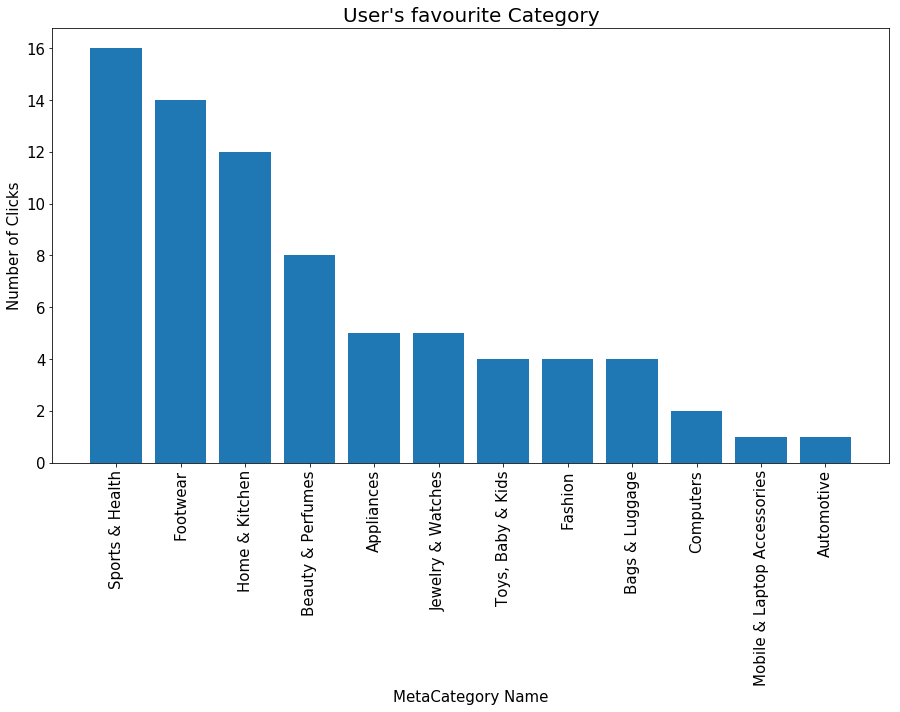

In [39]:
f, ax = plt.subplots(figsize=(15, 8)) 
y_pos = np.arange(len(graph[1]))
plt.bar(y_pos, user['Count'])
plt.xticks(y_pos, user['Name'],fontsize=15, rotation = 90)
plt.yticks(fontsize=15)
plt.xlabel('MetaCategory Name',fontsize=15)
plt.ylabel('Number of Clicks',fontsize=15)
plt.title("User's favourite Category",fontsize=20)
plt.show()